y = -0.1x + 3.9


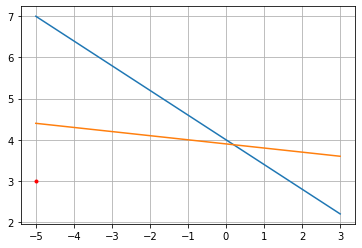

In [211]:
# Linear Regression::Absolute Trick Quiz 1
import matplotlib.pyplot as plt
import numpy as np

p, q = -5, 3

def get_line_coords(p, alpha=0.1):
    # orginal eq: y = -0.6x + 4
    return (-0.6 - (p * alpha)), (4 - alpha)

w1, w2 = get_line_coords(p)

print(f"y = {round(w1, 1)}x + {w2}")

x = np.linspace(-5, 3, 100)

y_orig = -0.6 * x + 4
plt.plot(x, y_orig)

y_new = round(w1, 1) * x + w2
plt.plot(x, y_new)

plt.plot([p], [q], marker='o', markersize=3, color="red")

plt.grid()

plt.show()

y = -0.4x + 3.96


<IPython.core.display.Javascript object>


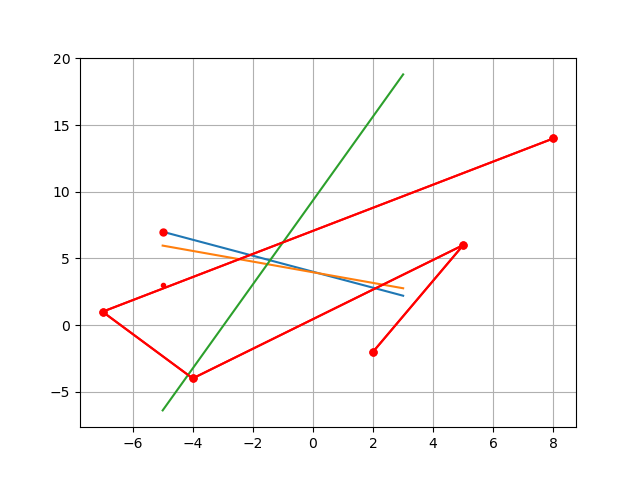

In [276]:
# Linear Regression::Square Trick Quiz 1
import matplotlib.pyplot as plt
import numpy as np

p, q = -5, 3

def get_line_coords(p, q, alpha=0.01):
    # orginal eq: y = -0.6x + 4 and to get q_prime, we'll have to solve it for y
    q_prime = -0.6 * p + 4

    # q - q' where q is the y coord of point and q' is the y coord of the line.
    q_diff = q - q_prime

    return (-0.6 + (p * alpha * q_diff)), (4 + (alpha * q_diff))

w1, w2 = get_line_coords(p, q) 

print(f"y = {round(w1, 1)}x + {w2}")

x = np.linspace(-5, 3, 100)

y_orig = -0.6 * x + 4
plt.plot(x, y_orig)

y_new = round(w1, 1) * x + w2
plt.plot(x, y_new)

plt.plot([p], [q], marker='o', markersize=3, color="red")

# Just a quick representation of where the q' will lie.
plt.plot([p], [-0.6 * p + 4], marker='o', markersize=5, color="red")

plt.grid()

plt.show()

In [294]:
# Linear Regression::Error Functions::Mean absolute error
points_list = [(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)]

line_coord_x, line_coord_y = (1.2, 2)

sum_of_error = 0

def get_y_prime(x):
    return line_coord_x * x + line_coord_y

for x_point, y_point in points_list:
    y_prime = get_y_prime(x_point)
    
    sum_of_error += abs(y_point - y_prime)
    
error = sum_of_error / len(points_list)

print(round(error, 2))

3.88


In [136]:
# Linear Regression::Error Functions::Mean squared error
points_list = [(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)]

line_coord_x, line_coord_y = (1.2, 2)

sum_of_error = 0

def get_y_prime(x):
    return line_coord_x * x + line_coord_y

for x_point, y_point in points_list:
    y_prime = get_y_prime(x_point)
    
    sum_of_error += (y_point - y_prime) ** 2
    
error = sum_of_error / (2 * len(points_list))

print(round(error, 2))

10.69


11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6
11.6


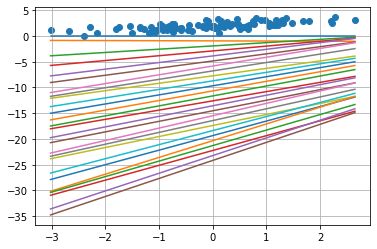

In [225]:
# Programming Quiz for "Mini-Batch Gradient Descent" personal implementation
import numpy as np

np.random.seed(42)

def get_dummy_data():
    return np.loadtxt('data.csv', delimiter=',')

def calc_mean_squared_error_for_batch(weight, x_coords, y_coords, bias, learning_rate=0.005):
    """
    Main equation is y = w1x + w2 or y_prime = weights * x_coord + bias
    
    y_diff = w1 + (alpha * (y - y_prime) * p) + (w2 + (alpha * (y - y_prime)))
    """
    y_pred = (x_coords @ weight) + bias
    print(y_prime)
    error = y_coords - y_prime
    
    w_new, b_new = weight + (learning_rate * (error @ x_coords)), bias + (error.sum() * learning_rate)
    
    return w_new, b_new


def run_batch_gradient_descent(x_coord_list, y_coord_list, learning_rate=0.001, batch_size=20, epochs = 25):
    total_points = x_coord_list.shape[0]
    
    result = []
    
    w = np.zeros(1)
    
    b = 0
    
    result.append( np.hstack((w, b)) )

    for _ in range(epochs):
        batch = np.random.choice(range(total_points), batch_size)
    
        x_coords = x_coord_list[batch,:]
    
        y_coords = y_coord_list[batch]

        w, b = calc_mean_squared_error_for_batch(w, x_coords, y_coords, b)
        
        result.append( np.hstack((w, b)) )
    
    return result


dummy_data = get_dummy_data()


x_coords = dummy_data[:, :-1]
y_coords = dummy_data[:, -1]

x_min = x_coords.min()
x_max = x_coords.max()

batch_gd_result = run_batch_gradient_descent(x_coords, y_coords)

plt.scatter(x_coords, y_coords)

for w, b in batch_gd_result:
    change = w + b
    
    plt.plot([x_min, x_max], [x_min * w + b, x_max * w + b])

plt.grid()

plt.show()

In [222]:
import numpy as np
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)


# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.001):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # compute errors
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    return W_new, b_new

# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


if __name__ == "__main__":
    # perform gradient descent
    data = np.loadtxt('data.csv', delimiter = ',')
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    print(regression_coef)
#     # plot the results
#     import matplotlib.pyplot as plt
    
#     plt.figure()
#     X_min = X.min()
#     X_max = X.max()
#     counter = len(regression_coef)
#     for W, b in regression_coef:
#         counter -= 1
#         color = [1 - 0.92 ** counter for _ in range(3)]
#         plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
#     plt.scatter(X, y, zorder = 3)
#     plt.show()

[array([0., 0.]), array([0.12341158, 0.2049234 ]), array([0.07713629, 0.37119546]), array([0.13991386, 0.52422169]), array([0.14017334, 0.66281191]), array([0.15514756, 0.77699134]), array([0.15039492, 0.88136108]), array([0.19857266, 0.99942708]), array([0.26441435, 1.1012103 ]), array([0.284643 , 1.1749923]), array([0.31173667, 1.2578259 ]), array([0.33257141, 1.29953887]), array([0.37719351, 1.35343161]), array([0.38658478, 1.41235015]), array([0.37639877, 1.48358489]), array([0.40449639, 1.51995864]), array([0.38520041, 1.57841031]), array([0.41715857, 1.63043345]), array([0.41430519, 1.66112077]), array([0.39842119, 1.68996465]), array([0.39392107, 1.71004375]), array([0.42072954, 1.72423628]), array([0.42726705, 1.74816547]), array([0.4565849 , 1.77112757]), array([0.45097337, 1.78769497]), array([0.4477919 , 1.82878844])]
